<a href="https://colab.research.google.com/github/grbhatt/colab/blob/main/Telco_Customer_Churn_Kaggle_datasets_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [98]:
pd.options.mode.chained_assignment = None

In [99]:
df = pd.read_csv("/WA_Fn-UseC_-Telco-Customer-Churn[1].csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [100]:
df.shape

(7043, 21)

In [101]:
df.drop('customerID',axis = 'columns',inplace=  True)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [102]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [103]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [104]:
pd.to_numeric(df.TotalCharges)

ValueError: ignored

In [105]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [106]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [107]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [108]:
df.shape

(7043, 20)

In [109]:
#now drop blank row of TotalCharges column

In [110]:
df1 = df[df.TotalCharges!= " "]
df1.shape

(7032, 20)

In [111]:
df['TotalCharges'].dtypes

dtype('O')

In [112]:
df1.TotalCharges =  pd.to_numeric(df1.TotalCharges)

In [113]:
df1.TotalCharges.dtypes

dtype('float64')

#Customers who left within the last month – the column is called **Churn**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


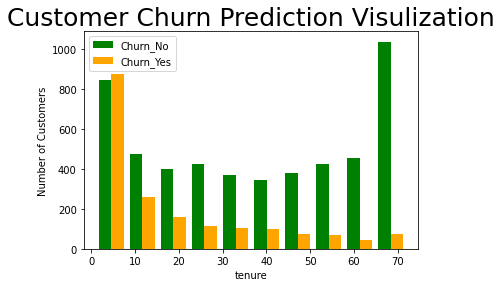

In [114]:
tn_churn_no = df1[df1.Churn == "No"].tenure
tn_churn_yes = df1[df1.Churn == "Yes"].tenure

plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visulization',color = 'black',fontsize = 25)

plt.hist([tn_churn_no,tn_churn_yes],color = ['green','orange'],label = ['Churn_No','Churn_Yes'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


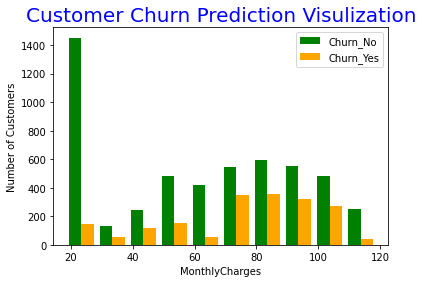

In [115]:
mc_churn_no = df1[df1.Churn == "No"].MonthlyCharges
mc_churn_yes = df1[df1.Churn == "Yes"].MonthlyCharges

plt.xlabel('MonthlyCharges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visulization',color = 'b',fontsize = 20)

plt.hist([mc_churn_no,mc_churn_yes],color = ['green','orange'],label = ['Churn_No','Churn_Yes'])
plt.legend()

In [116]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes =='object':
      print(f'{column}: {df[column].unique()}')

In [117]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [119]:
df1 = df1.replace('No internet service','No')
df1 = df1.replace('No phone service','No')

In [120]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [121]:
yes_no_columns = ['gender','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection'
                    ,'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [122]:
for col in yes_no_columns:
  df1[col].replace({'Yes':1,'No':0},inplace = True)

In [125]:
for col in df1:
  print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [126]:
df1['gender'].replace({'Female':1,"Male":0},inplace = True)

In [128]:
df1['gender'].unique()

array([1, 0])

In [130]:
df2 = pd.get_dummies(data  = df1,columns= ['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [131]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [132]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
df2[cols_to_scale]  = scalar.fit_transform(df2[cols_to_scale])

In [133]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,1,0,1,0,0,0,0,1,0


In [134]:
x = df2.drop('Churn',axis = 'columns')
y = df2['Churn']

In [138]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size  = 0.2, random_state = 1)

In [139]:
X_train.shape

(5625, 26)

In [140]:
X_test.shape

(1407, 26)

In [142]:
import tensorflow as tf
from tensorflow import keras

In [147]:
model = keras.Sequential([
              keras.layers.Dense(20,input_shape = (26,),activation='relu'),
              keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer = 'adam',
            loss = 'binary_crossentropy',
            metrics  = ['accuracy']
)

model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5630 - accuracy: 0.7355
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4494 - accuracy: 0.7860
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.7945
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4252 - accuracy: 0.7975
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4227 - accuracy: 0.8004
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4205 - accuracy: 0.8041
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.8046
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4180 - accuracy: 0.8068
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4172 - accuracy: 0.8043
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4166 - accura

In [148]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.7946


[0.4364555776119232, 0.7945984601974487]

In [149]:
yp = model.predict(X_test)
yp[:5]

array([[3.2326579e-04],
       [8.1076401e-01],
       [8.8974565e-02],
       [6.7083693e-01],
       [5.6752908e-01]], dtype=float32)

In [150]:
y_test[:5]

1778    0
5036    1
1106    0
1665    0
927     1
Name: Churn, dtype: int64

In [151]:
y_pred = []
for element in yp:
  if element>0.5:
    y_pred.append(1)

  else:
    y_pred.append(0)

In [152]:
y_pred[:5]

[0, 1, 0, 1, 1]

In [153]:
from sklearn.metrics import confusion_matrix,classification_report
print('Classification Report: \n',classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1041
           1       0.64      0.48      0.55       366

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Text(24.0, 0.5, 'Truth')

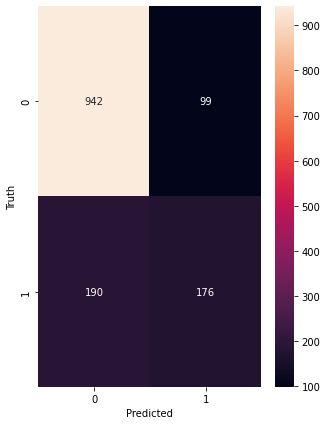

In [154]:
 import seaborn as sn
 cm = tf.math.confusion_matrix(labels = y_test,predictions=y_pred)
 plt.figure(figsize = (5,7))
 sn.heatmap(cm,annot = True,fmt ='d')
 plt.xlabel('Predicted')
 plt.ylabel('Truth')